In [1]:
import pandas as pd
import numpy as np

In [28]:
PATH = '/home/kai/data/kaggle/homecredit/'
# train = pd.read_csv(PATH + 'application_train.csv')
# print('train')
# test = pd.read_csv(PATH + 'application_test.csv')
# print('test')
# bureau = pd.read_csv(PATH + 'bureau.csv')
# print('bureau')
# prev = pd.read_csv(PATH + 'previous_application.csv')
# print('previous')
# bb = pd.read_csv(PATH + 'bureau_balance.csv')
# print('bureau_balance')
installments_payments = pd.read_csv(PATH + 'installments_payments.csv')
print('installments_payments done')
# credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
# # print('credit_card_balance')
POS_CASH_balance = pd.read_csv(PATH + 'POS_CASH_balance.csv')
print('POS_CASH_balance')
credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
print('credit_card_balance')
previous_application = pd.read_csv(PATH + 'previous_application.csv')
print('previous_application')

installments_payments done
POS_CASH_balance
credit_card_balance
previous_application


In [39]:
prev_ref = previous_application[previous_application['NAME_CONTRACT_STATUS']=='Refused']

In [40]:
set_prev = set(previous_application['SK_ID_PREV'])
set_ref = set(prev_ref['SK_ID_PREV'])


In [41]:
print(len(set_prev),len(set_ref))

1670214 290678


In [43]:
set_credit = set(credit_card_balance['SK_ID_PREV'])
set_pos = set(POS_CASH_balance['SK_ID_PREV'])
set_install = set(installments_payments['SK_ID_PREV'])

In [44]:
print(len(set_pos),len(set_install),len(set_credit))

936325 997752 104307


In [45]:
len(set_pos -set_ref )

936325

In [ ]:
len(set_credit - set_ref)

104307

In [ ]:

len(set_install - set_ref)

In [ ]:
a = set_prev - set_

In [15]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()

In [16]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [19]:
scale = StandardScaler()
test_col = installments_payments['AMT_PAYMENT'].fillna(20000)
test_col = test_col.values.reshape(-1,1)


In [20]:
# print(test_col)
test_col = scale.fit_transform(test_col)

k = test_col.ravel()
print(k)
df = pd.DataFrame(k)
import matplotlib as plt
df.plot()

In [21]:

print(test_col[:5])

[[-0.18802232]
 [-0.28361596]
 [ 0.14957417]
 [ 0.12993465]
 [-0.2755023 ]]


[-0.18802232 -0.28361596  0.14957417 ...,  0.05045111  0.05045111
  0.05045111]


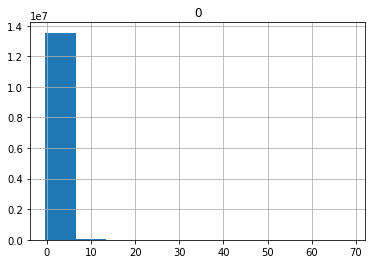

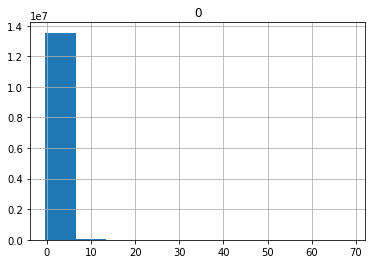

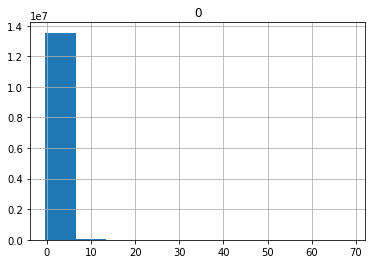

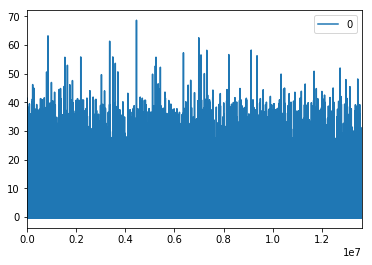

In [33]:
df = pd.DataFrame(k)
import matplotlib.pyplot as plt
df.hist
plt.show()

In [24]:
PATH = '/home/kai/data/kaggle/homecredit/'

app_train = pd.read_pickle(PATH + 'train_cleaned.pkl')
app_test = pd.read_pickle(PATH + 'test_cleaned.pkl')
from sklearn.preprocessing import LabelEncoder

categorical_feats = [
    'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

for x in categorical_feats:
    if app_train[x].dtype == 'object':
        print(x)
        app_train[x].fillna('na', inplace=True)
        app_test[x].fillna('na', inplace=True)
        app_train[x] = LabelEncoder().fit_transform(app_train[x])
        app_test[x] = LabelEncoder().fit_transform(app_test[x])
    else:
        app_train[x].fillna('na', inplace=True)
        app_test[x].fillna('na', inplace=True)
print('done')


from sklearn.model_selection import train_test_split 
import lightgbm as lgb


app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

#### prepare final Train X and Test X dataframes 
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test','ORGANIZATION_TYPE']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
ORGANIZATION_TYPE
WEEKDAY_APPR_PROCESS_START
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
done


In [25]:
numerical_features = [i for i in relevant_features if i not in ignore_features]

In [27]:
numerical_features= ['bureau_DAYS_CREDIT_max',
 'bureau_DAYS_CREDIT_min',
 'bureau_DAYS_CREDIT_std',
 'bureau_DAYS_CREDIT_mean',
 'bureau_DAYS_CREDIT_ENDDATE_max',
 'bureau_DAYS_CREDIT_ENDDATE_min',
 'bureau_DAYS_CREDIT_ENDDATE_std',
 'bureau_DAYS_CREDIT_ENDDATE_mean',
 'bureau_AMT_CREDIT_SUM_max',
 'bureau_AMT_CREDIT_SUM_min',
 'bureau_AMT_CREDIT_SUM_std',
 'bureau_AMT_CREDIT_SUM_mean',
 'bureau_AMT_CREDIT_SUM_LIMIT_max',
 'bureau_AMT_CREDIT_SUM_LIMIT_min',
 'bureau_AMT_CREDIT_SUM_LIMIT_std',
 'bureau_AMT_CREDIT_SUM_LIMIT_mean',
 'bureau_DAYS_CREDIT_UPDATE_max',
 'bureau_DAYS_CREDIT_UPDATE_min',
 'bureau_DAYS_CREDIT_UPDATE_std',
 'bureau_DAYS_CREDIT_UPDATE_mean',
 'bureau_AMT_ANNUITY_max',
 'bureau_AMT_ANNUITY_min',
 'bureau_AMT_ANNUITY_std',
 'bureau_AMT_ANNUITY_mean',
 'bureau_bureau_balance_score_max',
 'bureau_bureau_balance_score_min',
 'bureau_bureau_balance_score_std',
 'bureau_bureau_balance_score_mean',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_max',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_min',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_std',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_mean',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_max',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_min',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_std',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_mean',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_max',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_min',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_std',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_mean',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_max',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_min',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_std',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_mean',
 'bureau_bb_STATUS_count_max',
 'bureau_bb_STATUS_count_min',
 'bureau_bb_STATUS_count_std',
 'bureau_bb_STATUS_count_mean',
 'bureau_CREDIT_DAY_OVERDUE_max',
 'bureau_CREDIT_DAY_OVERDUE_min',
 'bureau_CREDIT_DAY_OVERDUE_std',
 'bureau_CREDIT_DAY_OVERDUE_mean',
 'bureau_CREDIT_DAY_OVERDUE_positive_count',
 'bureau_AMT_CREDIT_MAX_OVERDUE_max',
 'bureau_AMT_CREDIT_MAX_OVERDUE_min',
 'bureau_AMT_CREDIT_MAX_OVERDUE_std',
 'bureau_AMT_CREDIT_MAX_OVERDUE_mean',
 'bureau_AMT_CREDIT_MAX_OVERDUE_positive_count',
 'bureau_AMT_CREDIT_SUM_OVERDUE_max',
 'bureau_AMT_CREDIT_SUM_OVERDUE_min',
 'bureau_AMT_CREDIT_SUM_OVERDUE_std',
 'bureau_AMT_CREDIT_SUM_OVERDUE_mean',
 'bureau_AMT_CREDIT_SUM_OVERDUE_positive_count',
 'bureau_CNT_CREDIT_PROLONG_max',
 'bureau_CNT_CREDIT_PROLONG_min',
 'bureau_CNT_CREDIT_PROLONG_std',
 'bureau_CNT_CREDIT_PROLONG_mean',
 'bureau_CNT_CREDIT_PROLONG_positive_count',
 'bureau_AMT_CREDIT_SUM_DEBT_max',
 'bureau_AMT_CREDIT_SUM_DEBT_min',
 'bureau_AMT_CREDIT_SUM_DEBT_std',
 'bureau_AMT_CREDIT_SUM_DEBT_mean',
 'bureau_AMT_CREDIT_SUM_DEBT_positive_count',
 'bureau_AMT_CREDIT_SUM_DEBT_negative_count',
 'bureau_SK_ID_BUREAU_count']